In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# create the crl figures

# get data
crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"
file_name = "P3_20210927H1_213003-253558.cdf"

os.chdir( crl_path)
crl_data = xr.open_dataset( file_name)

crl_data

<xarray.Dataset>
Dimensions:             (Time: 7322, layers: 594)
Dimensions without coordinates: Time, layers
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (Time) float32 ...
    Lat                 (Time) float32 ...
    H                   (layers) float32 ...
    time                (Time) float32 ...
    LSR                 (Time, layers) float32 ...
    WVMR                (Time, layers) float32 ...
    T                   (Time, layers) float32 ...
    P_ch1               (Time, layers) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu

In [130]:
# testing lat lon things

#print( crl_data.P_ch1.values.max())
#print( crl_data.P_ch1.values.min())

# pick indices for limits for lat, lon, and time

# good for reproducing tc eye wrt lat: 2500 to 4000
# good for reproducing tc eye wrt lat: 4100 to 6725
# good for reproducing tc eye wrt lon: 1820 to 4000
# good for reproducing tc eye wrt lat and lon: 4700 to 6725
# kinda good for reproducing tc eye wrt lon: 0 to 1820 

index1 = 4700  
index2 = 6725  

# print( crl_data.time[index1:index2])
crl_lat = crl_data.Lat[index1:index2]
crl_lon = crl_data.Lon[index1:index2]
crl_height = crl_data.H[index1:index2]

print( len( crl_lat))
print( len( crl_data.H))

print( np.shape( crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()))

2025
594
(594, 2025)


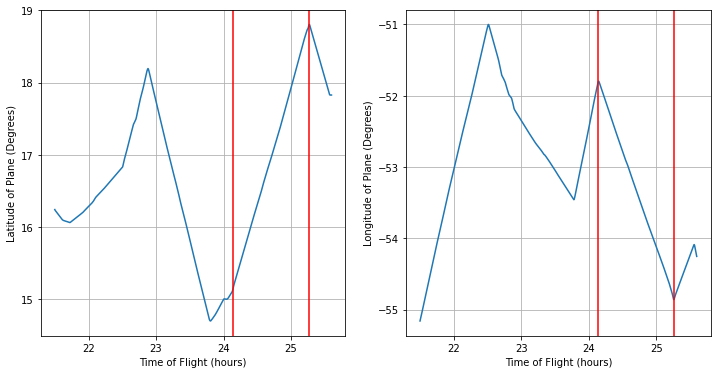

In [131]:
# plot how lat and lon vary over time to see if there is any overlap
fig = plt.figure( figsize=(12, 6))

plt.subplot( 121)
plt.plot( crl_data.time, crl_data.Lat)
plt.axvline(x=crl_data.time[index1], color='r')
plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Latitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')

plt.subplot( 122)
plt.plot( crl_data.time, crl_data.Lon)
plt.axvline(x=crl_data.time[index1], color='r')
plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Longitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')


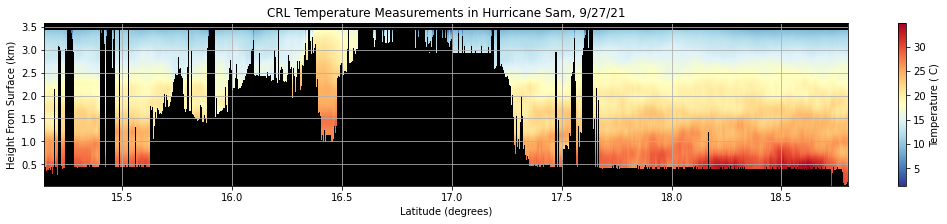

In [132]:
# temperature wrt latitude

fig = plt.figure( figsize=(18, 3))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

crl_lat = crl_data.Lat[index1:index2]
crl_lat_temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.pcolormesh( crl_lat, - crl_data.H, crl_lat_temp, cmap = color_map ) 
plt.title( 'CRL Temperature Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Latitude (degrees)')
plt.xlim( [ crl_data.Lat[index1], crl_data.Lat[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")
plt.show()

C:\Users\etmu9498\AppData\Local\Temp/ipykernel_9464/4189583726.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_temp, cmap = color_map )


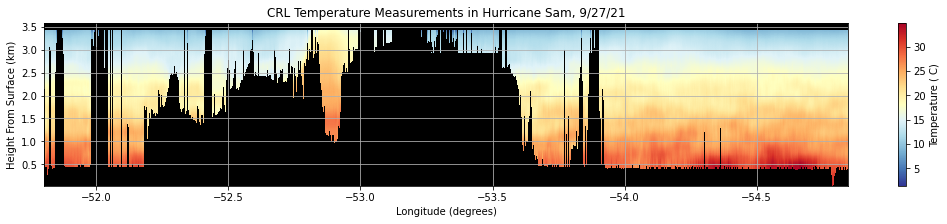

In [133]:
# temperature wrt longitude

fig = plt.figure( figsize=(18, 3))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

crl_lon = crl_data.Lon[index1:index2]
crl_lon_temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_temp, cmap = color_map ) 
plt.title( 'CRL Temperature Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Longitude (degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")
plt.show()

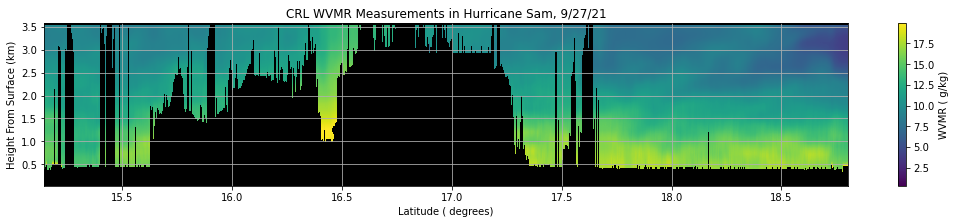

In [134]:
# plot wvmr wrt latitude
fig = plt.figure( figsize=(18, 3))

step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)

crl_lat = crl_data.Lat[index1:index2]
crl_lat_wvmr = step2[index1:index2, :].transpose()

plt.pcolormesh( crl_lat, - crl_data.H, crl_lat_wvmr )  
plt.title( 'CRL WVMR Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Latitude ( degrees)')
plt.xlim( [ crl_data.Lat[index1], crl_data.Lat[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="WVMR ( g/kg)")
plt.show()


C:\Users\etmu9498\AppData\Local\Temp/ipykernel_9464/3412812799.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_wvmr )


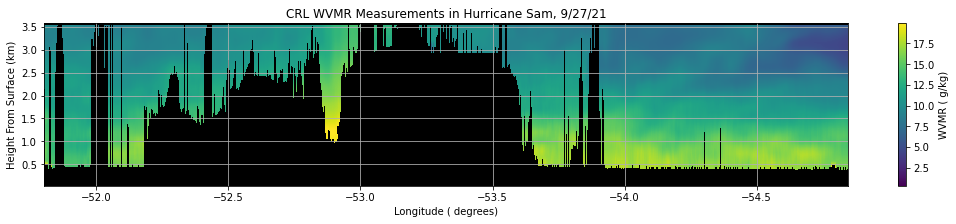

In [135]:
# plot wvmr wrt longitude
fig = plt.figure( figsize=(18, 3))

step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)

crl_lon = crl_data.Lon[index1:index2]
crl_lon_wvmr = step2[index1:index2, :].transpose()

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_wvmr )  
plt.title( 'CRL WVMR Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Longitude ( degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="WVMR ( g/kg)")
plt.show()

In [136]:
# Plot TDR 

# get data
tdr_path = "/Users/etmu9498/Desktop/research/sam-tdr/nc-files"
os.chdir( tdr_path)

inbound_name = "210927H1_2205_vert_inbound.nc"
outbound_name = "210927H1_2205_vert_outbound.nc"
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

outbound_data
#print( len( outbound_data.radius))
#print( len( outbound_data.latitude))
#print( len( outbound_data.height))
#print( np.shape( outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()))

#reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
#reflectivity = reflectivity[:, range( len( lat))]
#print( np.shape( reflectivity))

#lon = outbound_data.longitude[ ~np.isnan( outbound_data.longitude)]

#lat = outbound_data.latitude[ ~np.isnan( outbound_data.latitude)]
#print( len ( lat))
#lon = outbound_data.longitude[ ~np.isnan( outbound_data.longitude)]
#print( len ( lon))

<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, radius: 167)
Coordinates:
  * time             (time) float32 7.951e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * radius           (radius) float32 1.5 3.0 4.5 6.0 ... 247.5 249.0 250.5
Data variables: (12/15)
    azimuth          (radius) float32 ...
    altitude         (radius) float32 ...
    latitude         (radius) float32 ...
    longitude        (radius) float32 ...
    seconds          (radius) float32 ...
    u air            (radius) float32 ...
    ...               ...
    ws air           (radius) float32 ...
    Radial_wind      (radius, heading, height, time) float32 ...
    Tangential_Wind  (radius, heading, height, time) float32 ...
    Vertical_wind    (radius, heading, height, time) float32 ...
    Wind_Speed       (radius, heading, height, time) float32 ...
    REFLECTIVITY     (radius, heading, height, time) float32 ...
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210927H1
    STMNAME:                                                SAM
    RADAR:                                                  TAIL
    EXPERIMENT:                                             SAM
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 79506.0
    ETIME1:                                                 79506.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

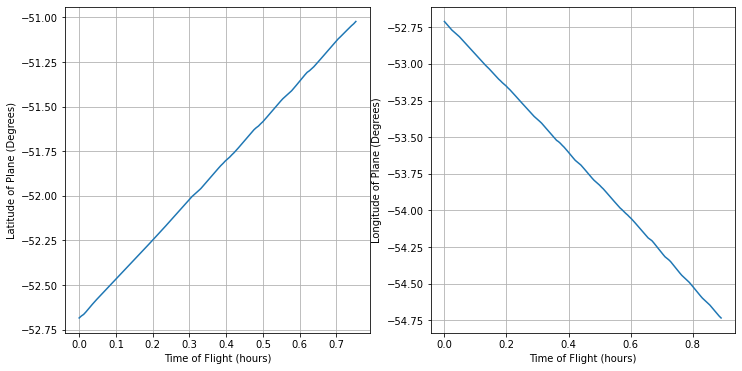

In [137]:
# plot latitude and longitude to check for overlaps like before... looks like there are no issues here!

fig = plt.figure( figsize=(12, 6))

index = np.linspace(0, 1, 167)

plt.subplot( 121)
plt.plot( index, outbound_data.longitude)
# plt.axvline(x=crl_data.time[index1], color='r')
# plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Latitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')

plt.subplot( 122)
plt.plot( index, inbound_data.longitude)
# plt.axvline(x=crl_data.time[index1], color='r')
# plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Longitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')

16.0636


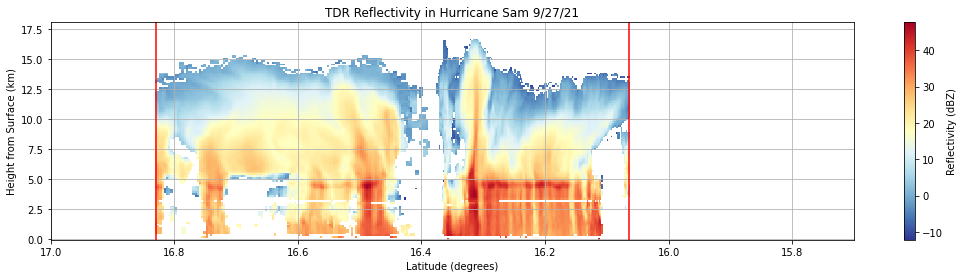

In [138]:
# make TDR figure wrt Latitude

fig = plt.figure( figsize=(18, 4))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()


# plot outbound data

# get rid of nans and resize array to get rid of overlapping data

lat = outbound_data.latitude[ ~np.isnan( outbound_data.latitude)]
lat = np.linspace( lat[0], lat[-1], len( lat))
reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lat) )]

plt.pcolormesh( lat, outbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=16.829, color='r')

# Plot inbound data

min_lat = inbound_data.latitude.min().values
print( min_lat)

lat = inbound_data.latitude[ ~np.isnan( inbound_data.latitude)]
lat = np.linspace( lat[0], min_lat, len( lat))
reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lat) )]

plt.pcolormesh( lat, inbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=16.0636, color='r')

# making things prettier
plt.title( 'TDR Reflectivity in Hurricane Sam 9/27/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Latitude (degrees)')
plt.xlim( [ 15.7, 17])
plt.grid( 'on')
plt.gca().invert_xaxis()

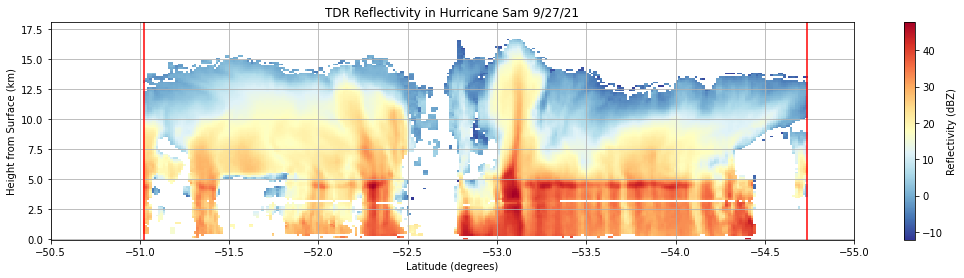

In [139]:
# make TDR figure wrt Longitude

fig = plt.figure( figsize=(18, 4))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()


# plot outbound data

# get rid of nans and resize array to get rid of overlapping data

lon = outbound_data.longitude[ ~np.isnan( outbound_data.longitude)]
# lon = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, outbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=-51.0229, color='r')

# Plot inbound data

lon = inbound_data.longitude[ ~np.isnan( inbound_data.longitude)]
lat = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, inbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=-54.7339, color='r')

# making things prettier
plt.title( 'TDR Reflectivity in Hurricane Sam 9/27/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Latitude (degrees)')
plt.xlim( [ -55, -50.5])
plt.grid( 'on')
plt.gca().invert_xaxis()


C:\Users\etmu9498\AppData\Local\Temp/ipykernel_9464/4274885834.py:51: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_temp, cmap = color_map )


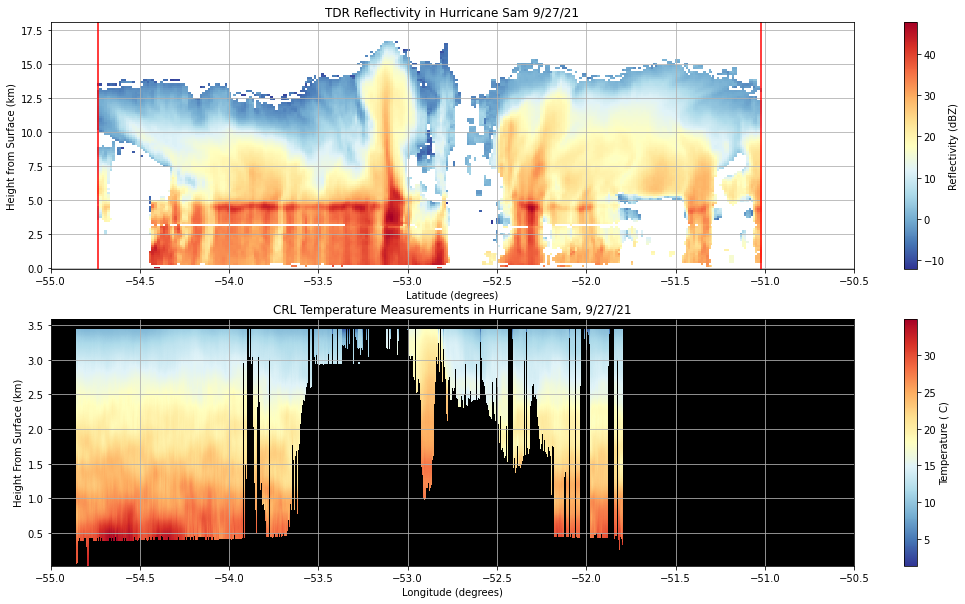

In [140]:
# crl and tdr figures together

# make TDR figure wrt Longitude

fig = plt.figure( figsize=(18, 10))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.subplot(211)


# plot outbound data

# get rid of nans and resize array to get rid of overlapping data

lon = outbound_data.longitude[ ~np.isnan( outbound_data.longitude)]
# lon = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, outbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=-51.0229, color='r')

# Plot inbound data

lon = inbound_data.longitude[ ~np.isnan( inbound_data.longitude)]
lat = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, inbound_data.height, reflectivity, cmap = color_map )
plt.axvline(x=-54.7339, color='r')

# making things prettier
plt.title( 'TDR Reflectivity in Hurricane Sam 9/27/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Latitude (degrees)')
plt.xlim( [ -55, -50.5])
plt.grid( 'on')
# plt.gca().invert_xaxis()



# crl part

plt.subplot(212)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

crl_lon = crl_data.Lon[index1:index2]
crl_lon_temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_temp, cmap = color_map ) 
plt.title( 'CRL Temperature Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Longitude (degrees)')
plt.xlim( [ -55, -50.5]  )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")
plt.show()